Номер в списке: 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import cv2
import math

## Часть 1. Исследование эффектов дискретизации.

1. Синтезировать конечный сигнал $x(t)$, представляющий из себя сумму двух синусоид с разными частотами:
$$x(t) = \sin (2\pi \nu_1 t) + \sin (2\pi \nu_2 t),\ \ \nu_1 = 40,\ \nu_2 = 75 \text{ (вариант 3)}$$

In [2]:
nu_1 = 40
nu_2 = 75

x = lambda t: np.sin(2 * np.pi * nu_1 * t) + np.sin(2 * np.pi * nu_2 * t)

2. Определить допустимые значения частоты дискретизации $f_\text{д}$ для сигнала $x(t)$.

Максимальная частота $F_{max} = 75$. По теореме Котельникова: $f_\text{д} > 2F_{max}$. Тогда минимальная подходящая частота дискретизации:
$$f_\text{д} = 2 \cdot 75 = 150 \text{ Гц}$$

3. Построить по отсчетам графики дискретного сигнала и его спектра при нескольких различных частотах дискретизации (больше и меньше граничной частоты дискретизации). Сделать вывод.

Рассмотрим частоты 50 Гц и 200 Гц. При 50 Гц будет происходить наложение частот (50 Гц < $f_\text{д}$), а вот при 200 Гц мы увидим 2 пика, как и должно быть (200 Гц > $f_\text{д}$).

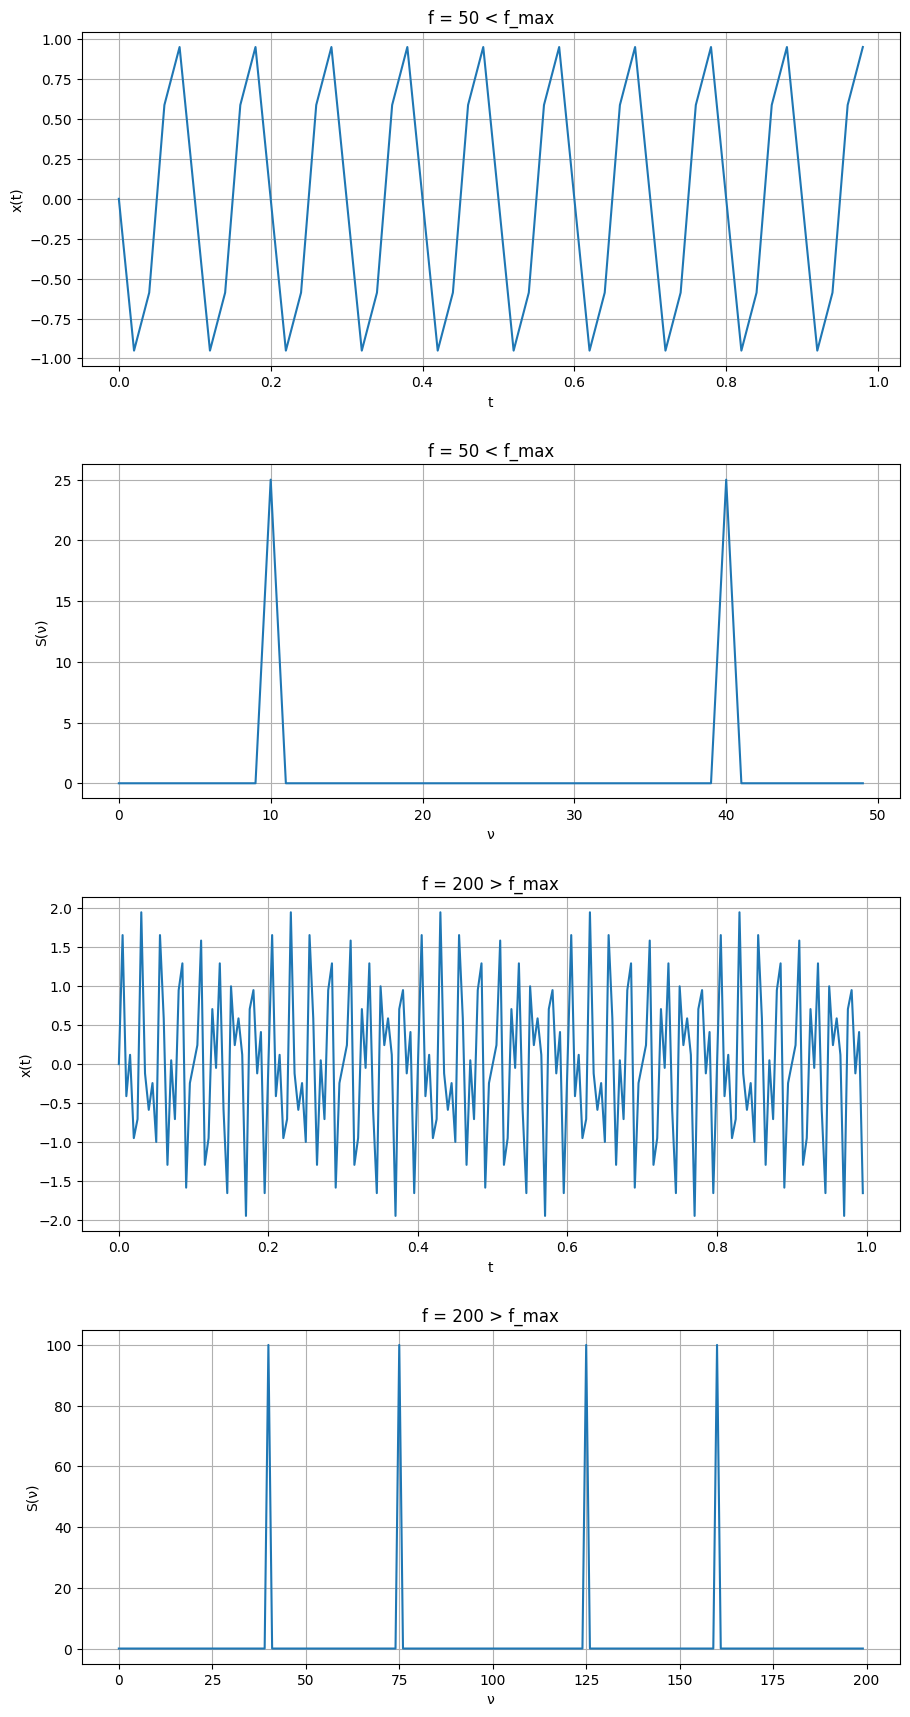

In [3]:
fig, ax = plt.subplots(4, 1)
fig.set_figheight(18)
fig.set_figwidth(10)
fig.tight_layout(pad=5)

frequency = 50

plt.subplot(4, 1, 1)
plt.grid(True)
plt.title(f'f = {frequency} < f_max')
plt.xlabel("t")
plt.ylabel("x(t)")
X = np.arange(0, 1, 1 / frequency)
Y = x(X)
plt.plot(X, Y);

plt.subplot(4, 1, 2)
plt.grid(True)
plt.title(f'f = {frequency} < f_max')
plt.xlabel("ν")
plt.ylabel("S(ν)")
X = np.arange(0, frequency, 1)
Y = abs(np.fft.fft(x(np.arange(0, 1, 1 / frequency))))
plt.plot(X, Y);



frequency = 200

plt.subplot(4, 1, 3)
plt.grid(True)
plt.title(f'f = {frequency} > f_max')
plt.xlabel("t")
plt.ylabel("x(t)")
X = np.arange(0, 1, 1 / frequency)
Y = x(X)
plt.plot(X, Y);

plt.subplot(4, 1, 4);
plt.grid(True)
plt.title(f'f = {frequency} > f_max')
plt.xlabel("ν")
plt.ylabel("S(ν)")
X = np.arange(0, frequency, 1)
Y = abs(np.fft.fft(x(np.arange(0, 1, 1 / frequency))))
plt.plot(X, Y);

4. Проиллюстрировать на примере сигнала $x(t)$ эффект наложения частот. Для этого необходимо привести сигнал $x'(t)$, который при некоторой частоте дискретизации будет совпадать с сигналом $x(t)$. (Такого эффекта можно добиться, если провести дискретизацию сигнала $x(t)$ с неверной частотой дискретизации и затем восстановить его).

Сигнал $x(t)$ состоит из двух синусоид. Можно заметить, что синусоида $\sin (2 \pi \nu_2 t),\ \nu_2 = 75$ при частоте дискретизации $f_\text{д} = 50$ никакого вклада не вносит. Действительно, при такой частоте дискретизации мы получаем $\Delta t = \frac{1}{50}$, а значит все значения $t$ будут иметь вид $\frac{n}{50}$, где $n = 0,\, 1,\, ...,\, 50$. Подставим это в синус:
$$\sin \left(2 \pi \cdot 75 \frac{n}{50}\right) = \sin (3 \pi n) = 0$$

Отсюда можно сделать вывод, что в качестве сигнала $x'(t)$ можно взять оставшуюся синусоиду, то есть:
$$x'(t) = \sin (2 \pi \nu_1 t),\ \nu_1 = 40$$

Frequency: 50
Error: 5.0959236830294685e-14

Frequency: 200
Error: 1.0


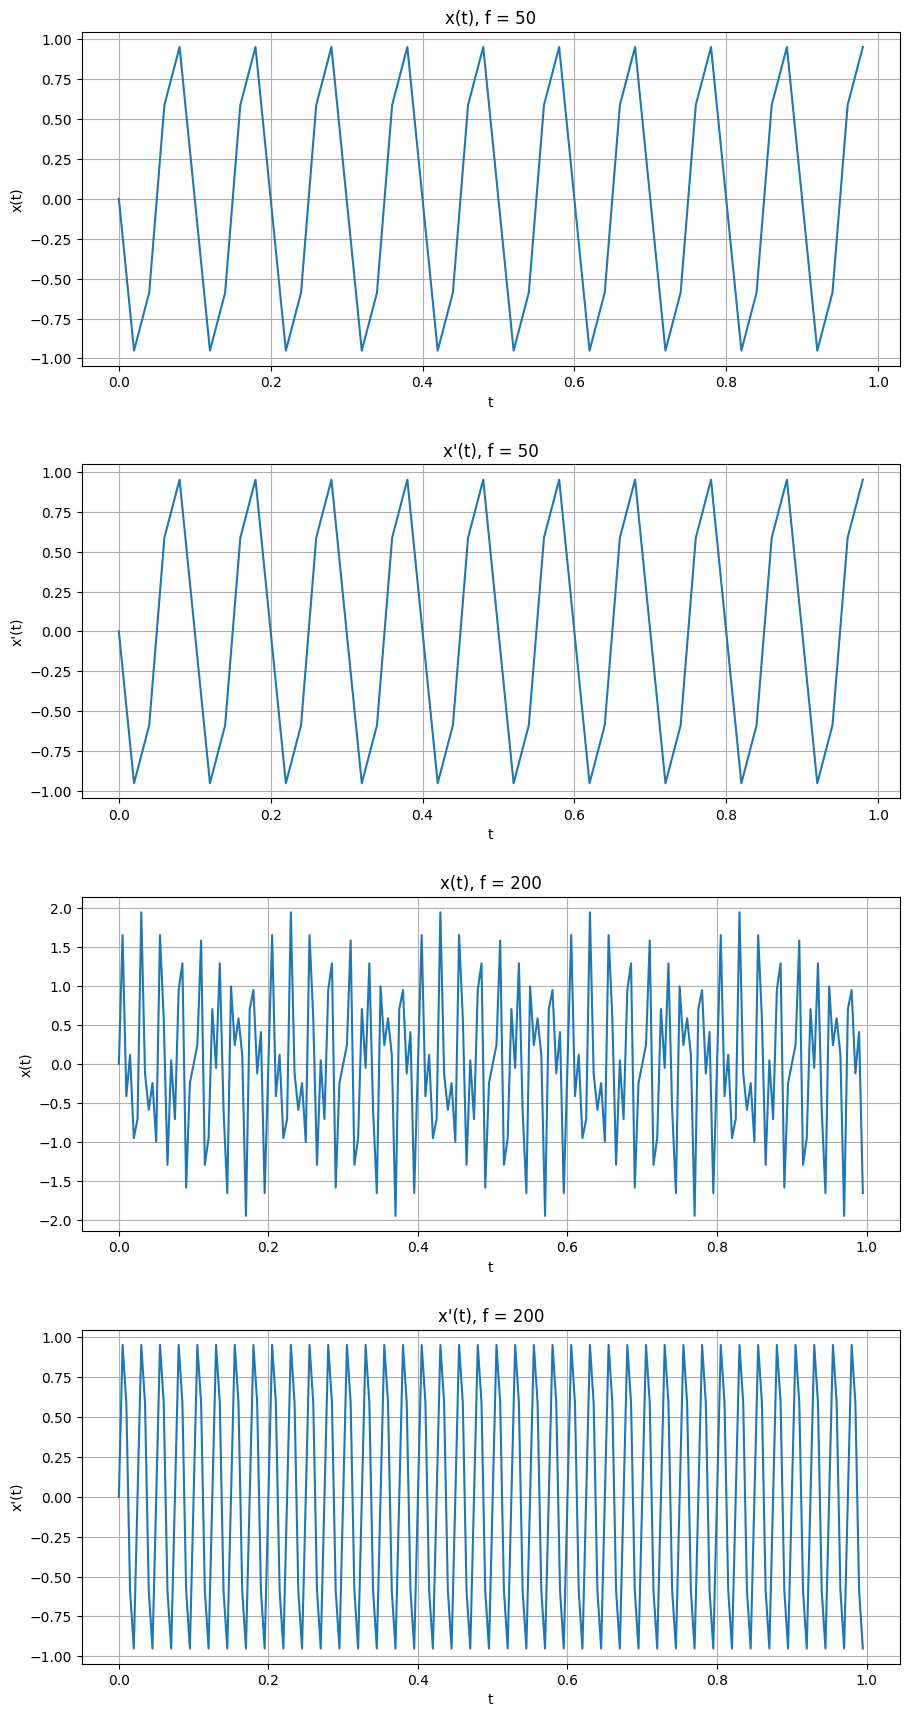

In [4]:
new_x = lambda t: np.sin(2 * np.pi * nu_1 * t)

fig, ax = plt.subplots(4, 1)
fig.set_figheight(18)
fig.set_figwidth(10)
fig.tight_layout(pad=5)

frequency = 50

plt.subplot(4, 1, 1)
plt.grid(True)
plt.title(f"x(t), f = {frequency}")
plt.xlabel("t")
plt.ylabel("x(t)")
X = np.arange(0, 1, 1 / frequency)
Y_1 = x(X)
plt.plot(X, Y_1);

plt.subplot(4, 1, 2)
plt.grid(True)
plt.title(f"x'(t), f = {frequency}")
plt.xlabel("t")
plt.ylabel("x'(t)")
X = np.arange(0, 1, 1 / frequency)
Y_2 = new_x(X)
plt.plot(X, Y_2);

print(f"Frequency: {frequency}\nError: {np.amax(abs(Y_1 - Y_2))}")
print()



frequency = 200

plt.subplot(4, 1, 3)
plt.grid(True)
plt.title(f"x(t), f = {frequency}")
plt.xlabel("t")
plt.ylabel("x(t)")
X = np.arange(0, 1, 1 / frequency)
Y_1 = x(X)
plt.plot(X, Y_1);

plt.subplot(4, 1, 4)
plt.grid(True)
plt.title(f"x'(t), f = {frequency}")
plt.xlabel("t")
plt.ylabel("x'(t)")
X = np.arange(0, 1, 1 / frequency)
Y_2 = new_x(X)
plt.plot(X, Y_2);

print(f"Frequency: {frequency}\nError: {np.amax(abs(Y_1 - Y_2))}")

5. Загрузить тестовое изображение. Уменьшить частоту дискретизации в 2, 3, 4 раза с помощью прореживания матрицы исходного изображения. Сравнить полученные результаты с результатом использования скрипта, приведенного далее. Дополнительно можете сравнить полученные изображения с результатами, выдаваемыми функцией imresize.

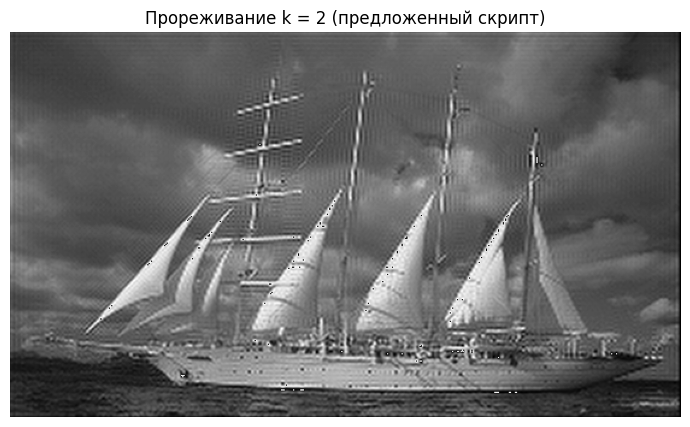

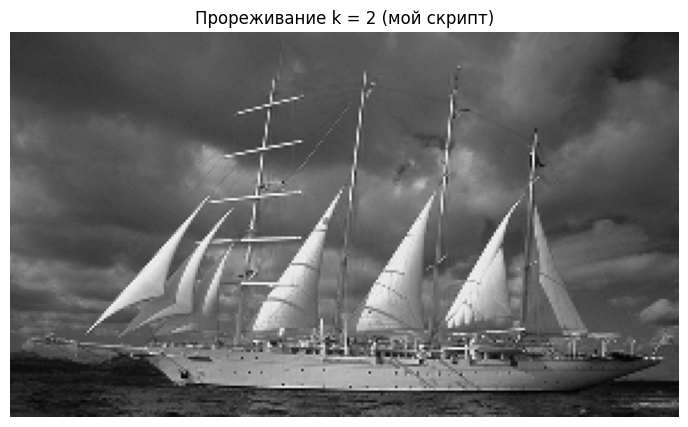

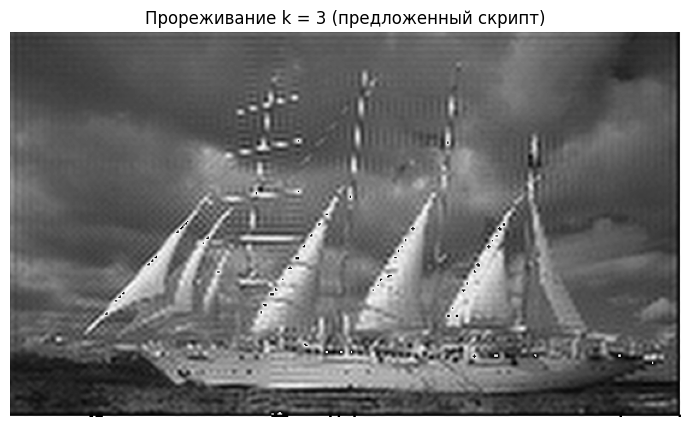

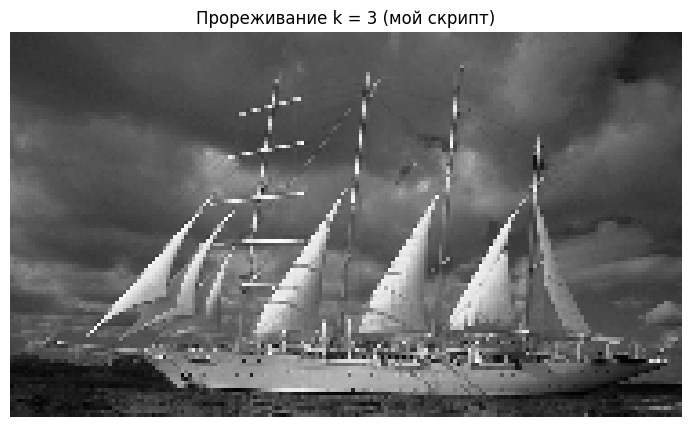

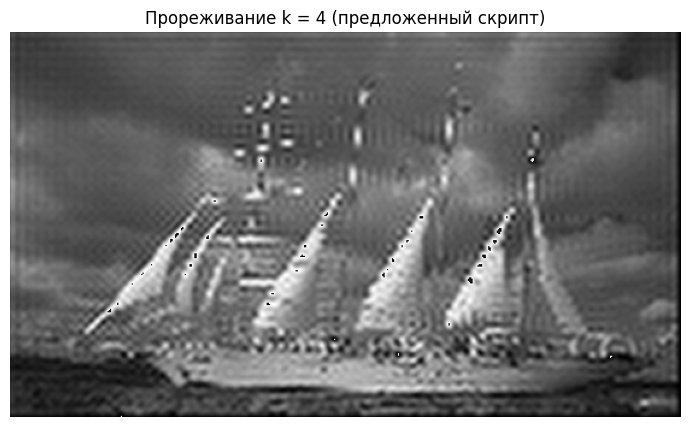

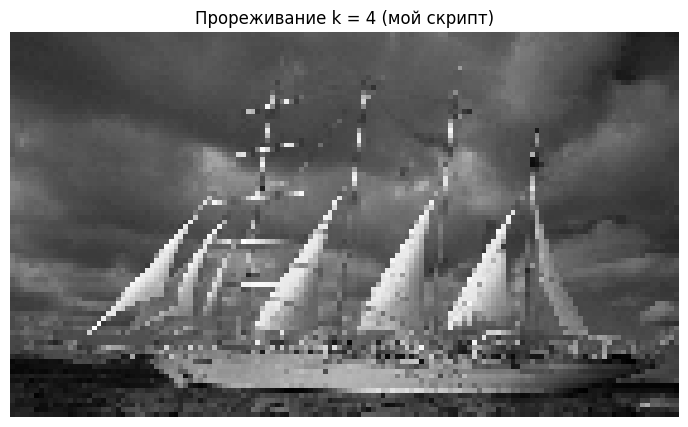

In [5]:
fd = cv2.imread("var6.png", 0) # считывание исходного изображения
M, N = fd.shape # размеры изображения fd

for k in [2, 3, 4]: # коэффициент прореживания. Должен быть натуральным числом!
    plt.figure(figsize=(18, 5))
    plt.title(f"Прореживание k = {k} (предложенный скрипт)");
    Mk = M // k # строк в прореженном изображении
    Nk = N // k # столбцов в прореженном изображении
    ff = fd[:Mk * k:k, :Nk * k:k] # прореженное изображение

    # функции Котельникова задаем таблично в SincArray
    ColumnInd = np.array([i for i in range(max(Mk, Nk))])
    SincArray = np.zeros((max(M, N), max(Mk, Nk)))
    for j in range(max(M, N)):
        SincArray[j][:max(Mk, Nk)] = np.sinc(j / k - ColumnInd)

    # получаем интерполированное по формуле Котельникова изображение:
    F = SincArray[:M, :Mk] @ ff @ SincArray[:N, :Nk].T
    plt.imshow(np.uint8(F), cmap='gray')
    plt.axis('off')
    plt.show()

    plt.figure(figsize=(18, 5))
    plt.title(f"Прореживание k = {k} (мой скрипт)")
    #уменьшаем изображение в к раз
    F = np.zeros((Mk, Nk));
    for i in range(N // k):
        for j in range(M // k):
            F[j][i] = fd[j * k][i * k]
    plt.imshow(np.uint8(F), cmap='gray')
    plt.axis('off')
    plt.show()

## Часть 2. Исследование эффектов квантования

1. Синтезировать случайный дискретный сигнал $x(k)$, состоящий из нескольких сотен отсчётов с одинаковым равномерным распределением. Построить по отсчетам его график.

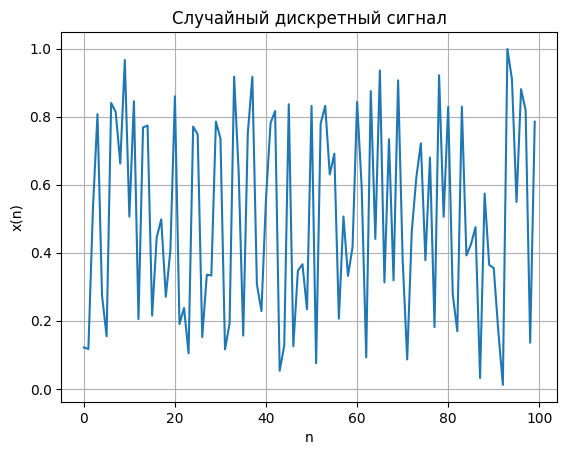

In [6]:
k = 100
border = (0, 1)
x = np.random.uniform(border[0], border[1], k)
plt.plot(x)
plt.title("Случайный дискретный сигнал")
plt.xlabel("n")
plt.ylabel("x(n)")
plt.grid(True)

2. Провести равномерное квантование с округлением отсчетов сигнала $x(k)$, используя от 1 до 8 бит на отсчет. Построить ступенчатые графики сигнала после квантования с помощью функции stairs.

In [7]:
def uniform_levels(border, bit):
    n = 2 ** bit
    q = (border[1] - border[0]) / n
    d = [border[0] + (j + 0.5) * q for j in range(n)]

    return q, d
    
def quantisation(x, d):
    quanted_x = []
    for e in x:
        for i in range(1, len(d)):
            if d[i] > e:
                if abs(e - d[i]) < abs(e - d[i - 1]):
                    quanted_x.append(d[i])
                else:
                    quanted_x.append(d[i - 1])
                break
        else:
            quanted_x.append(d[-1])

    return quanted_x

def visualise(x, title):
    plt.figure()
    plt.stairs(x)
    plt.title(title)
    plt.xlabel("n")
    plt.ylabel("x(n)")
    plt.grid(True)

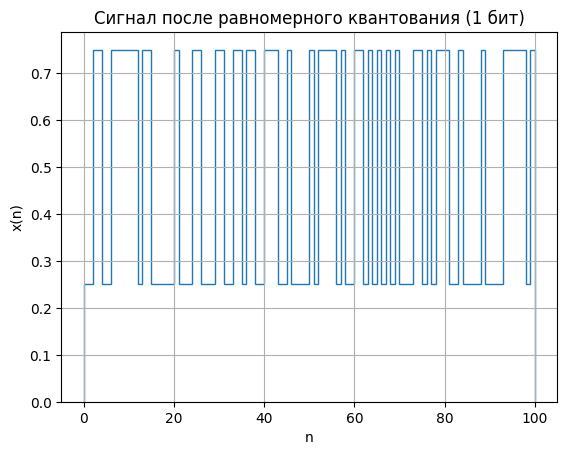

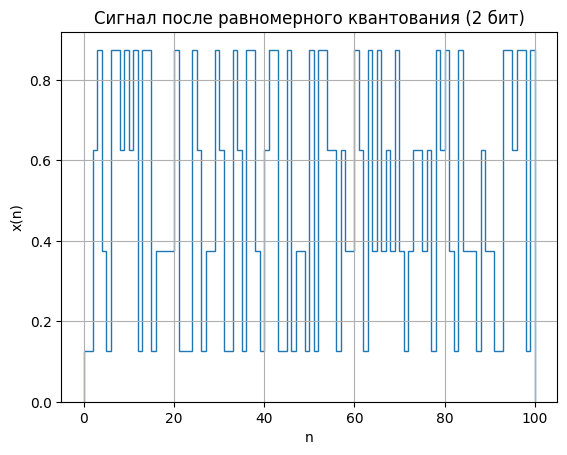

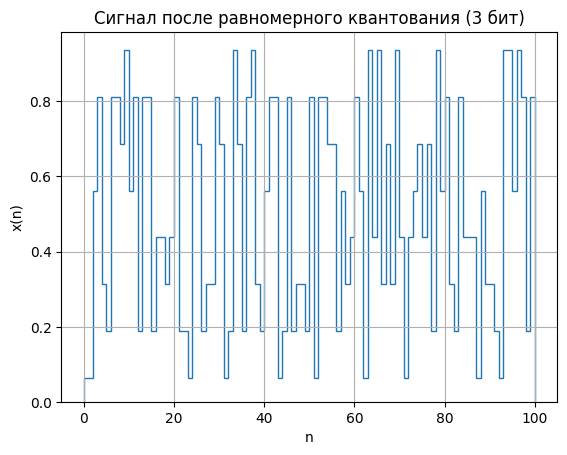

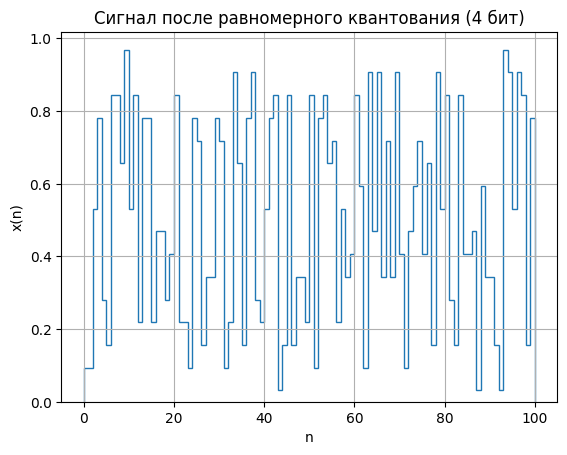

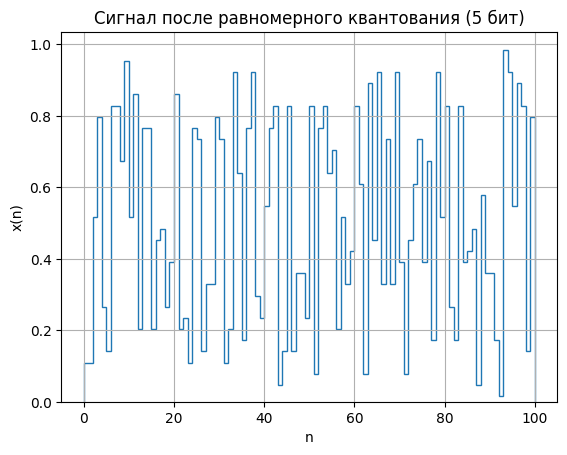

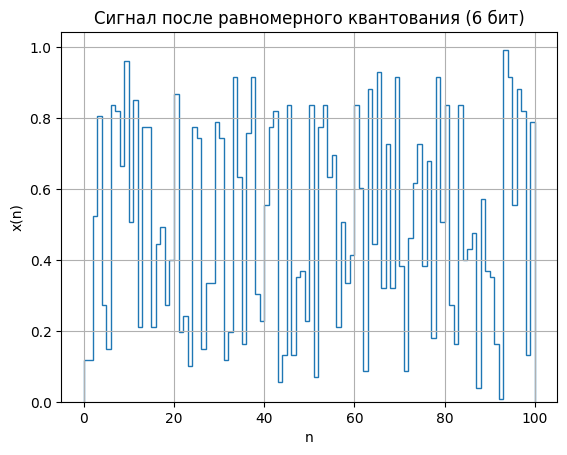

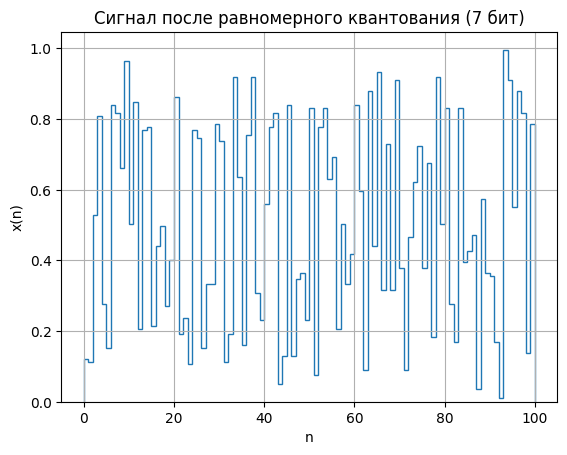

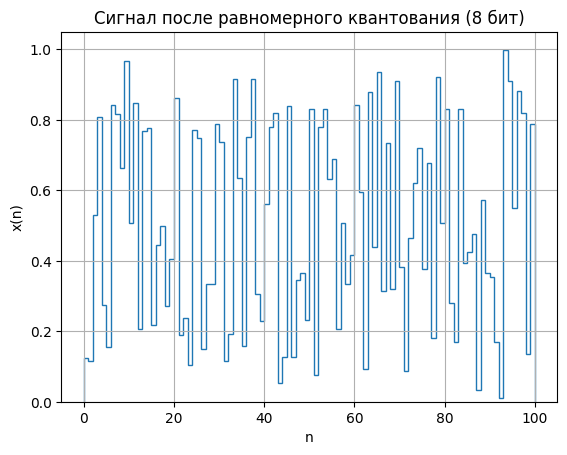

In [8]:
quanted_x = []
q = []

bits = [i for i in range(1, 9)]
for bit in bits:
    tmp_q, levels = uniform_levels(border, bit)
    q.append(tmp_q)
    quanted_x.append(quantisation(x, levels))
    visualise(quanted_x[-1], f"Сигнал после равномерного квантования ({bit} бит)")

3. Экспериментально оценить ошибку квантования (2). Сравнить полученные результаты с теоретической оценкой $\overline{\varepsilon^2} = D(\varepsilon) = \frac{q^2}{12}$, где q – шаг равномерного квантования. Построить график зависимости ошибки квантования количества битов, выделяемых на кодирование одногоотсчета.

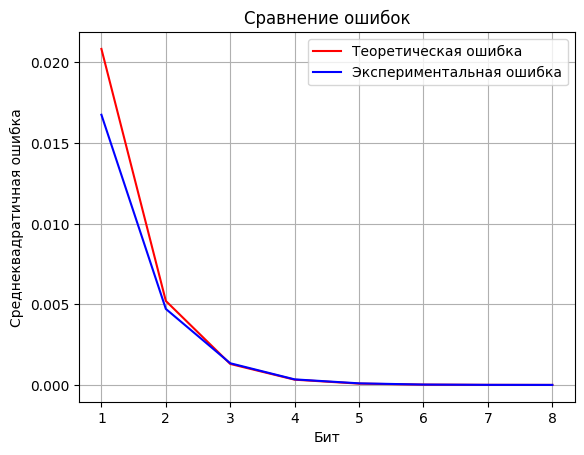

In [9]:
squared_errors = []
for new_x in quanted_x:
    squared_errors.append([])
    for i in range(k):
        squared_errors[-1].append(abs(x[i] - new_x[i]) ** 2)

theoretical_errors = []
experimental_errors = []
for i in range(len(squared_errors)):
    theoretical_errors.append(q[i] ** 2 / 12)
    experimental_errors.append(np.mean(squared_errors[i]))

plt.plot(bits, theoretical_errors, color="r", label="Теоретическая ошибка")
plt.plot(bits, experimental_errors, color="b", label="Экспериментальная ошибка")
plt.legend()
plt.xlabel("Бит")
plt.ylabel("Среднеквадратичная ошибка")
plt.title("Сравнение ошибок")
plt.grid(True)

4. Вычислить значение SNR (3). Исследовать зависимость SNR от числа битов, выделяемых на один отсчет сигнала.

Чем больше бит мы выделяем на отсчет сигнала, тем меньше ошибка квантования (шум). На графике это хорошо видно.

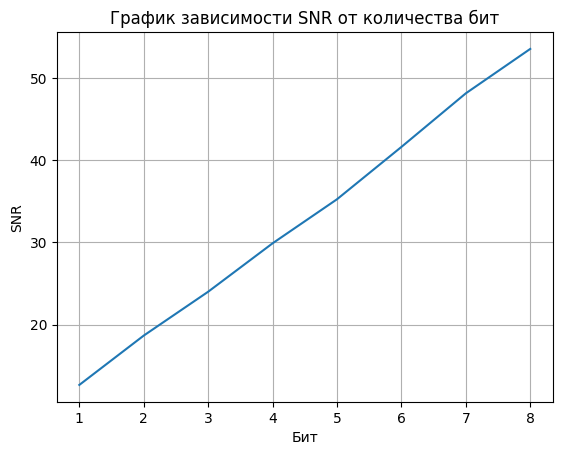

In [10]:
snrs = []
for i in range(len(bits)):
    snrs.append(10 * math.log10(np.mean([k**2 for k in quanted_x[i]]) / np.mean(squared_errors[i])))
    
plt.plot(bits, snrs)
plt.title("График зависимости SNR от количества бит")
plt.xlabel("Бит")
plt.ylabel("SNR")
plt.grid(True)

5. Используя функцию randn, синтезировать случайный дискретный сигнал $x(k)$ с нормальным распределением, где $m = \nu$ и $\sigma = \nu + 1$ ($\nu$ – номер варианта). Построить по отсчетам его график.

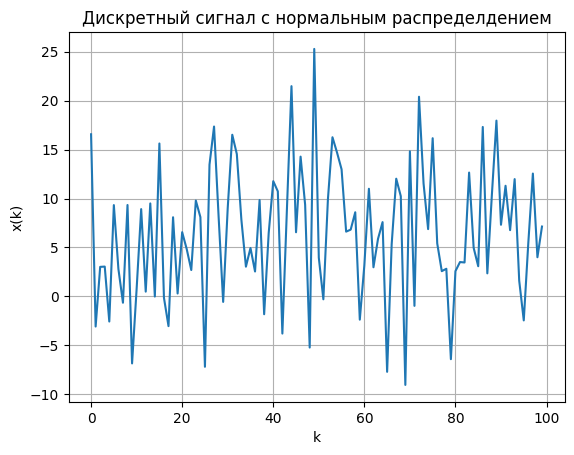

In [11]:
nu = 6

m = nu
sig = nu + 1
n = 100

x = np.random.normal(m, sig, n)

plt.plot(x)
plt.title("Дискретный сигнал с нормальным распределдением")
plt.xlabel("k")
plt.ylabel("x(k)")
plt.grid(True)

6. Определить параметры квантователя Ллойда-Макса:
$$t_k' = t_k\sigma + m,\ \ \ d_k' = d_k\sigma + m,$$ где $\{t_k\}$ и $\{d_k\}$ - параметры оптимального квантования для стандартного нормального распределения с параметрами $m = 0$, $\sigma = 1$.

In [12]:
def lloyd_max_levels(m, sig, bit):
    if bit == 1:
        t = [-np.inf, 0, np.inf]
        d = [-0.7979, 0.7979]
    elif bit == 2:
        t = [-np.inf, -0.9816, 0, 0.9816, np.inf]
        d = [-1.5104, -0.4528, 0.4528, 1.5104]
    elif bit == 3:
        t = [-np.inf, -1.7479, -1.0500, -0.5005, 0, 0.5005, 1.0500, 1.7479, np.inf]
        d = [-2.1519, -1.3439, -0.7560, -0.2451, 0.2451, 0.7560, 1.3439, 2.1519]
    elif bit == 4:
        t = [-np.inf, -2.4008, -1.8435, -1.4371, -1.0993, -0.7995, -0.5224, -0.2582, 0, 0.2582, 0.5224, 0.7995, 1.0993, 1.4371, 1.8435, 2.4008, np.inf]
        d = [-2.7326, -2.0690, -1.6180, -1.2562, -0.9423, -0.6568, -0.3880, -0.1284, 0.1284, 0.3880, 0.6568, 0.9423, 1.2562, 1.6180, 2.0690, 2.7326]

    t = [t_k * sig + m for t_k in t]
    d = [d_k * sig + m for d_k in d]

    return t, d

7. Выполнить оптимальное квантование сигнала $x(k)$, используя от 1 до 4 битов на отсчет.

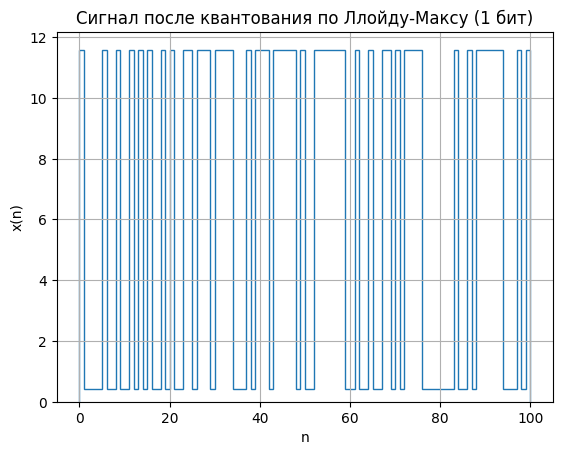

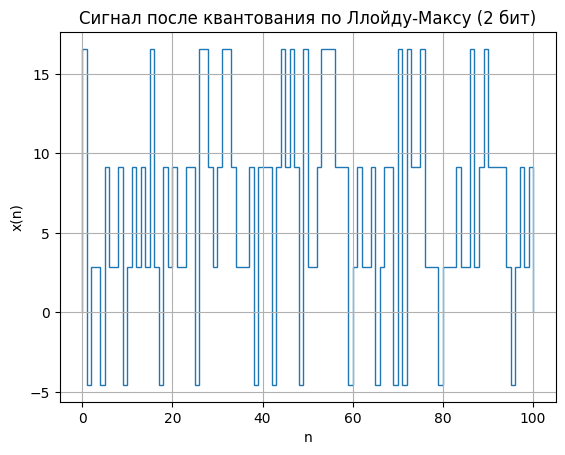

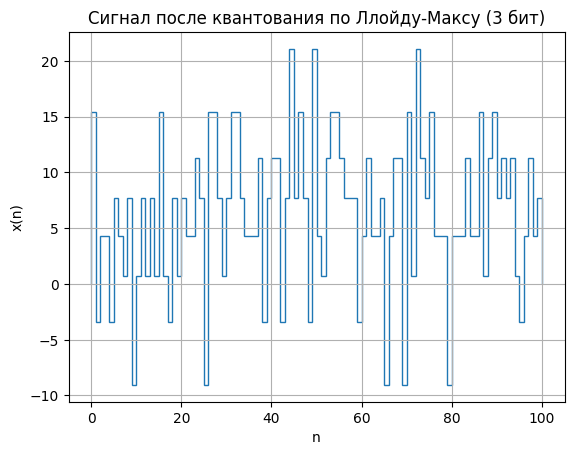

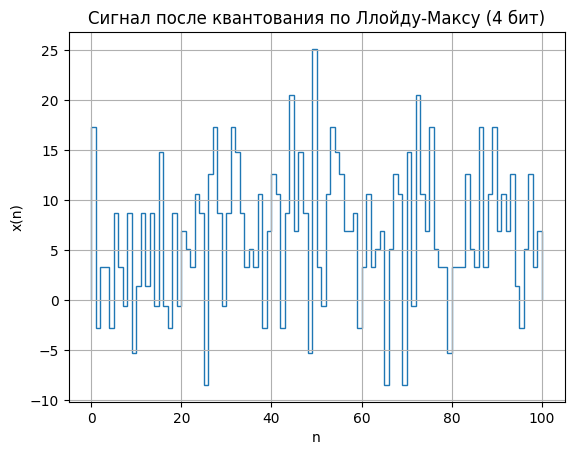

In [13]:
bits = [i + 1 for i in range(4)]

quanted_x = []
for bit in bits:
    t, levels = lloyd_max_levels(m, sig, bit)
    quanted_x.append(quantisation(x, levels))
    visualise(quanted_x[-1], f"Сигнал после квантования по Ллойду-Максу ({bit} бит)")

8. Вычислить выборочные значения ошибки (2), (6) и SNR.

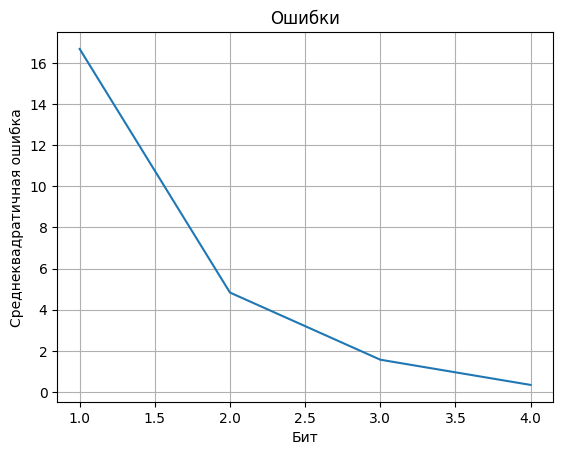

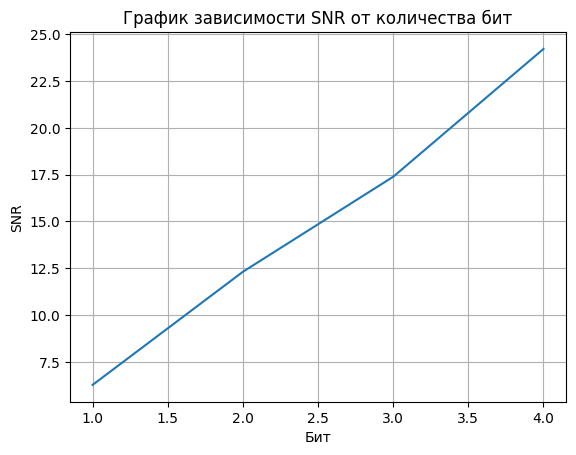

In [14]:
squared_errors = []
for new_x in quanted_x:
    squared_errors.append([])
    for i in range(k):
        squared_errors[-1].append(abs(x[i] - new_x[i]) ** 2)

experimental_errors = []
for i in range(len(squared_errors)):
    experimental_errors.append(np.mean(squared_errors[i]))

snrs = []
for i in range(len(bits)):
    snrs.append(10 * math.log10(np.mean([k**2 for k in quanted_x[i]]) / experimental_errors[i]))

plt.figure()
plt.plot(bits, experimental_errors)
plt.xlabel("Бит")
plt.ylabel("Среднеквадратичная ошибка")
plt.title("Ошибки")
plt.grid(True)

plt.figure()
plt.plot(bits, snrs)
plt.title("График зависимости SNR от количества бит")
plt.xlabel("Бит")
plt.ylabel("SNR")
plt.grid(True)

9. Выполнить равномерное квантование сигнала $x(k)$ при числе битов на отсчет от 1 до 4. Сравнить ошибки квантования с полученными в предыдущем пункте.

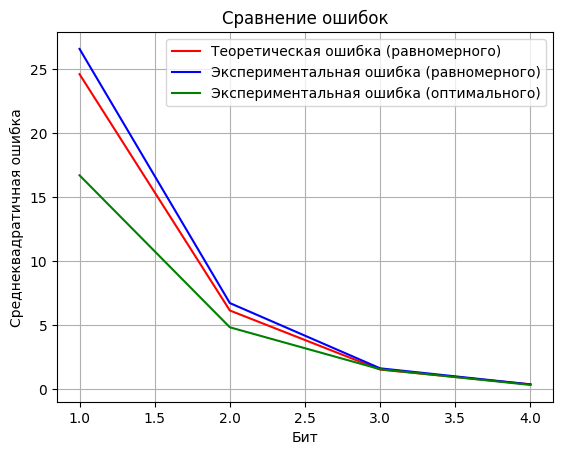

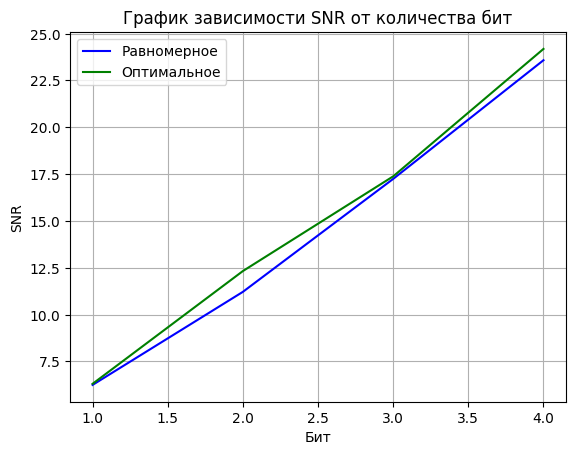

In [16]:
new_quanted_x = []
q = []
for bit in bits:
    tmp_q, levels = uniform_levels((min(x), max(x)), bit)
    q.append(tmp_q)
    new_quanted_x.append(quantisation(x, levels))
    #visualise(quanted_x[-1], f"Сигнал после равномерного квантования ({bit} бит)")

new_squared_errors = []
for new_x in new_quanted_x:
    new_squared_errors.append([])
    for i in range(k):
        new_squared_errors[-1].append(abs(x[i] - new_x[i]) ** 2)
        
theoretical_errors = []
new_experimental_errors = []
for i in range(len(bits)):
    theoretical_errors.append(q[i] ** 2 / 12)
    new_experimental_errors.append(np.mean(new_squared_errors[i]))

new_snrs = []
for i in range(len(bits)):
    new_snrs.append(10 * math.log10(np.mean([k**2 for k in new_quanted_x[i]]) / new_experimental_errors[i]))

plt.figure()
plt.plot(bits, theoretical_errors, color="r", label="Теоретическая ошибка (равномерного)")
plt.plot(bits, new_experimental_errors, color="b", label="Экспериментальная ошибка (равномерного)")
plt.plot(bits, experimental_errors, color="g", label="Экспериментальная ошибка (оптимального)")
plt.legend()
plt.xlabel("Бит")
plt.ylabel("Среднеквадратичная ошибка")
plt.title("Сравнение ошибок")
plt.grid(True)

plt.figure()
plt.plot(bits, new_snrs, color="b", label="Равномерное")
plt.plot(bits, snrs, color="g", label="Оптимальное")
plt.legend()
plt.xlabel("Бит")
plt.ylabel("SNR")
plt.title("График зависимости SNR от количества бит")
plt.grid(True)